In [ ]:
#!pip install ipympl matplotlib numpy

In [ ]:
# from google.colab import output
# output.enable_custom_widget_manager()

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from math import *
from itertools import product

In [25]:
rng = np.random.default_rng(3123)
a, b, c, d = rng.uniform(-3, 3, 4)
print(f"{a}x^3+{b}x^2+{c}x+{d}")
fs = tuple(
    [
        (
            "ax^3+bx^2+cx+d",
            np.vectorize(lambda x: a*x**3 + b*x**2 + c*x + d)
        ),
        (
            "x*sin(2*pi*x)",
            np.vectorize(lambda x: x*sin(2*pi*x))
        )
    ]
)

1.003462237779405x^3+-2.2062955720244632x^2+0.2565071784178121x+-1.4311190460086651


In [49]:
Ns = [20]
epsilon0s = [.2, 1]
epsilon_rngs = tuple(
    [
        (
            "normal: 0, ep0",
            lambda n, ep0: rng.normal(0, ep0, n)
        ),
        (
            "uniform",
            lambda n, ep0: rng.uniform(-ep0, ep0, n),
        ),
    ]
)

In [50]:
pr = tuple(product(fs, Ns, epsilon0s, epsilon_rngs))

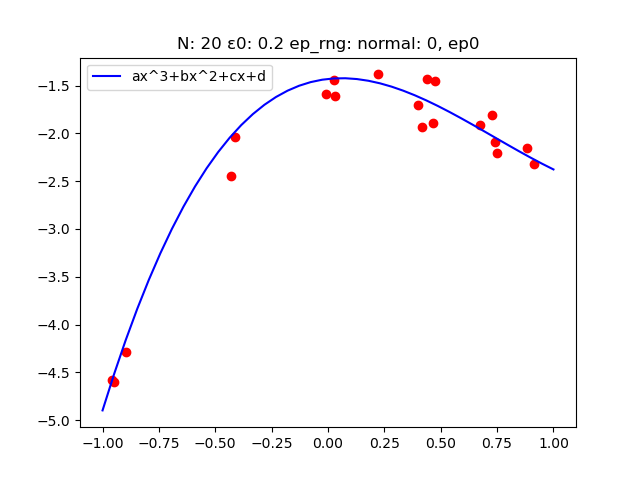

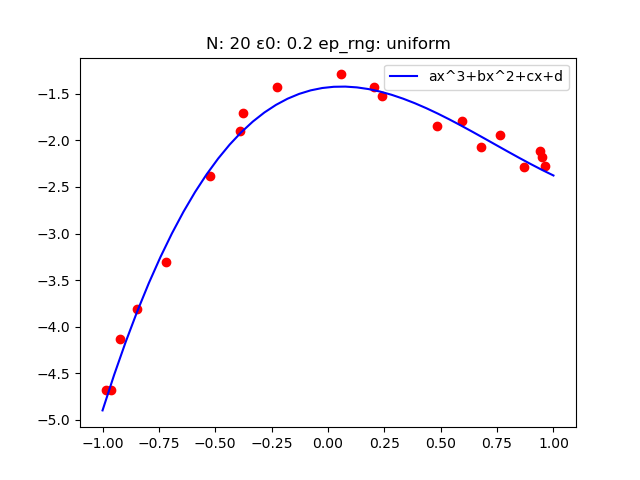

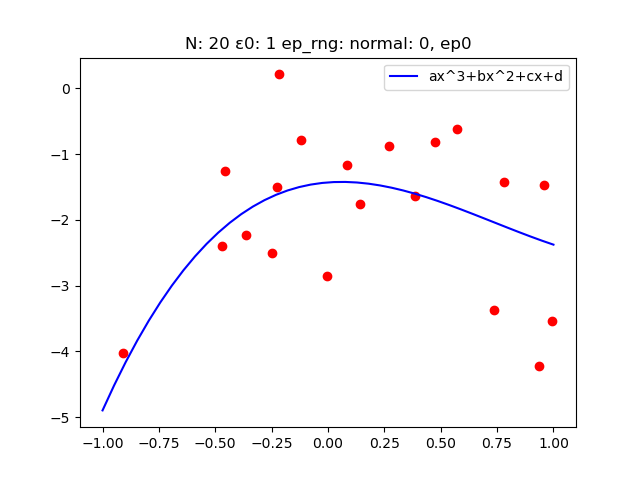

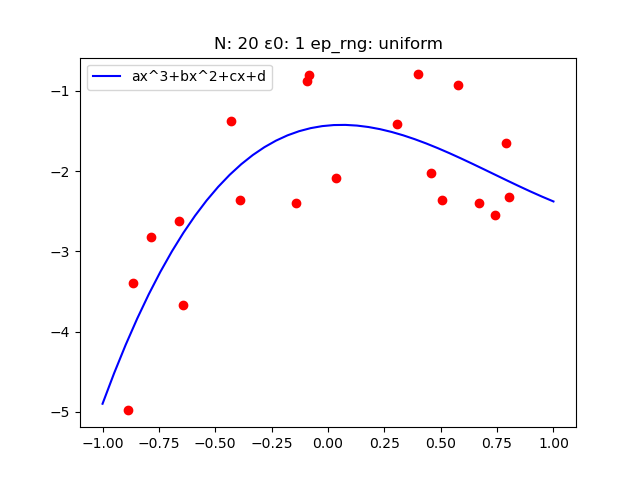

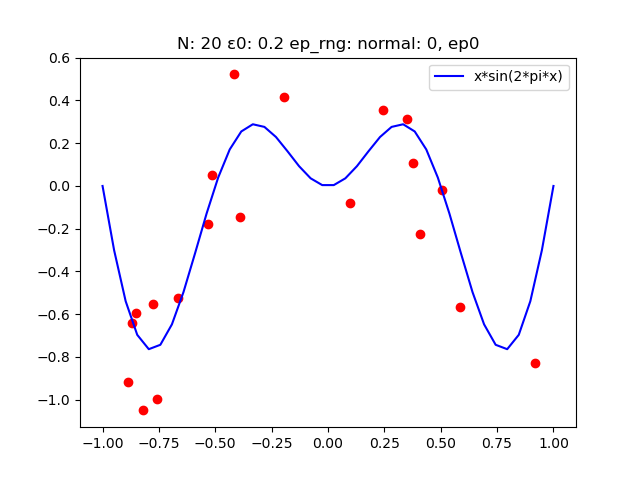

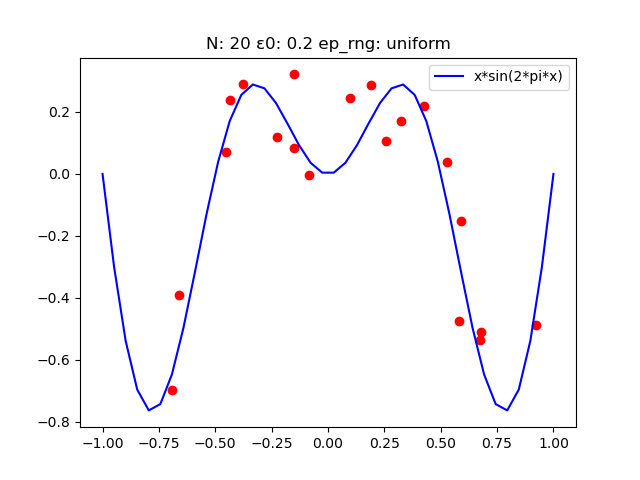

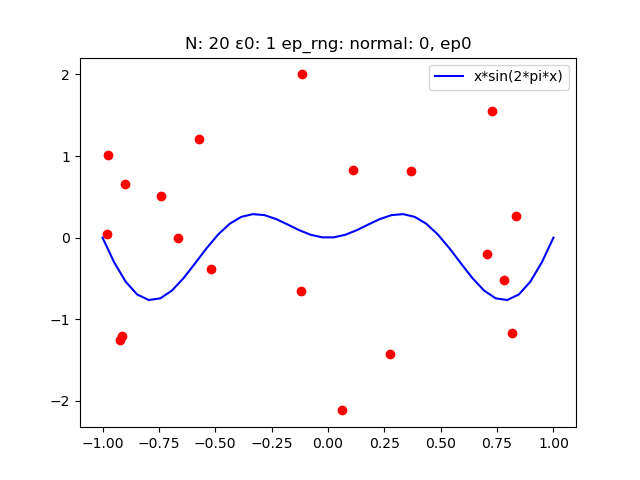

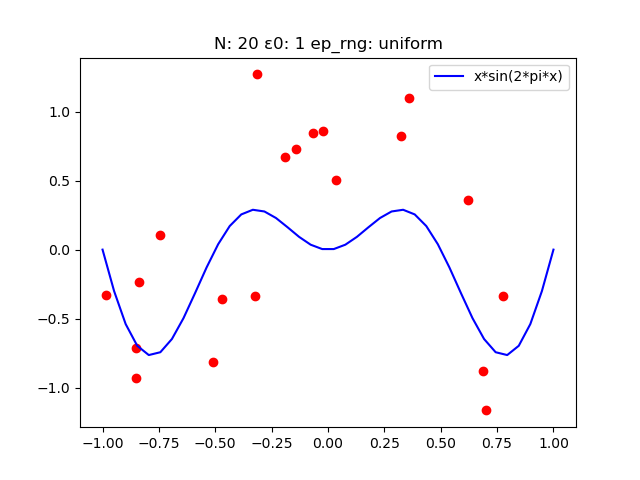

In [52]:

for (f_name, f), N, epsilon0, (e_rng_name, e_rng) in pr:
    epsilon = e_rng(N, epsilon0)
    fig, ax = plt.subplots()
    x = np.linspace(-1, 1, 40)
    ax.plot(x, f(x), "b", label=f_name)
    x_c = rng.uniform(-1, 1, N)
    y_c = f(x_c) + epsilon
    ax.scatter(x_c, y_c, c="r")
    ax.legend()
    ax.title.set_text(f"N: {N} ε0: {epsilon0} ep_rng: {e_rng_name}")